# Visualizing World Cup Data With Seaborn

A little primer on the Fifa World Cup:
The FIFA World Cup, or simply the World Cup, is an international fútbol competition where 32 countries qualify to send teams made up of the best players from that nation to compete against each other for the World Cup championship.

The World Cup championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War.

The current format of the tournament involves 32 teams competing for the title at venues within the host nation over a period of one month.

In [2]:
#load the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

First, we'll read in three datasets. In order to plot them in Seaborn, we'll combine them using NumPy's .concatenate() function into a Pandas DataFrame.

In [15]:
df = pd.read_csv("data/WorldCupMatches.txt")
display(df.head())

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [17]:
# Use this to Display in Github Markdown
import tabulate
print(df.head().to_markdown())

|    |   Year | Datetime            | Stage   | Stadium        | City       | Home Team Name   |   Home Team Goals |   Away Team Goals | Away Team Name   | Win conditions   |   Attendance |   Half-time Home Goals |   Half-time Away Goals | Referee                | Assistant 1              | Assistant 2                |   RoundID |   MatchID | Home Team Initials   | Away Team Initials   |
|---:|-------:|:--------------------|:--------|:---------------|:-----------|:-----------------|------------------:|------------------:|:-----------------|:-----------------|-------------:|-----------------------:|-----------------------:|:-----------------------|:-------------------------|:---------------------------|----------:|----------:|:---------------------|:---------------------|
|  0 |   1930 | 13 Jul 1930 - 15:00 | Group 1 | Pocitos        | Montevideo | France           |                 4 |                 1 | Mexico           |                  |         4444 |                      3 |    

In [19]:
#The data in WorldCupMatches.csv has the goals scored in each match broken up by goals for the home team and goals for the away team. We want to visualize the total number of goals scored in each match.


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,TotalGoals
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,5
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,3
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,3
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,4
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,1


The data in WorldCupMatches.csv has the goals scored in each match broken up by goals for the home team and goals for the away team. We want to visualize the total number of goals scored in each match.

In [20]:
df["TotalGoals"]=df["Home Team Goals"]+df["Away Team Goals"]
display(df.head())

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,TotalGoals
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,5
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,3
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,3
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,4
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,1


Text(0.5, 1.0, 'Meaningful Title')

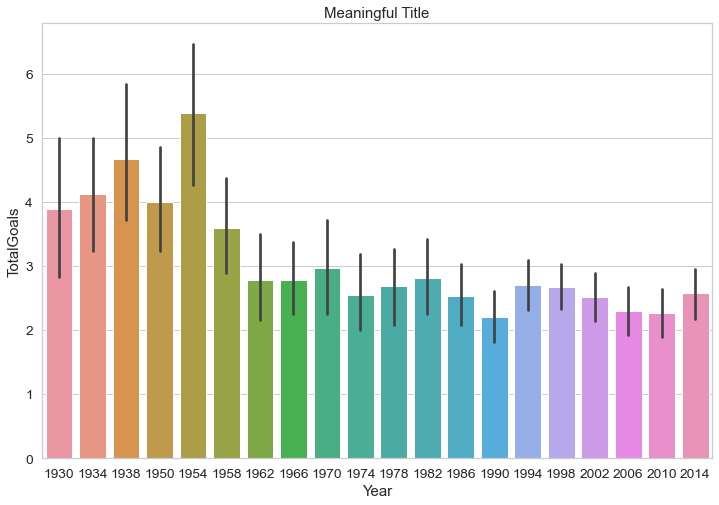

In [33]:
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(data=df,x="Year",y="TotalGoals")
ax.set_title("Meaningful Title")

Text(0.5, 1.0, 'Meaningful Title')

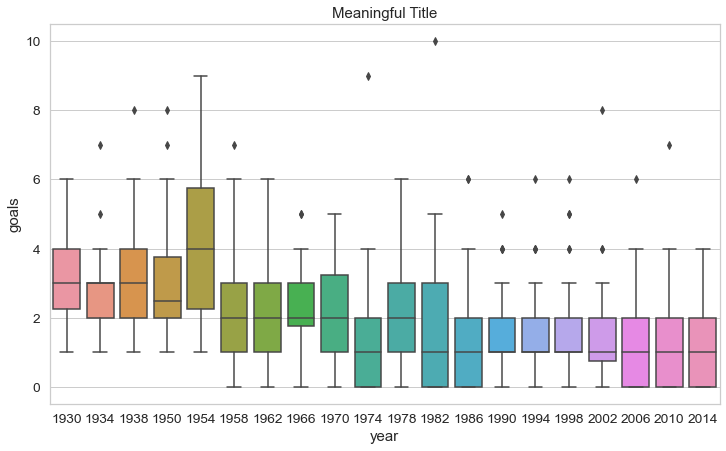

In [38]:
df_goals = pd.read_csv("data/goals.txt")
f,ax2 = plt.subplots(figsize=(12,7))
ax2 = sns.boxplot(data=df_goals,x="year",y="goals")
ax2.set_title("Meaningful Title")

First Lets plot each of these datasets as bars

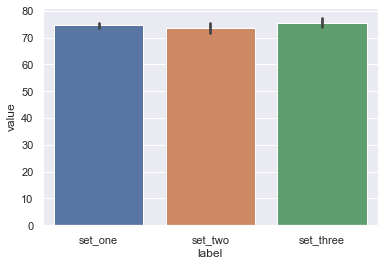

In [13]:
sns.barplot(data=df,x='label',y='value')
plt.show()

We can use barplots to find out information about the mean - but it doesn't give us a sense of how spread out the data is in each set. To find out more about the distribution, we can use a KDE plot.

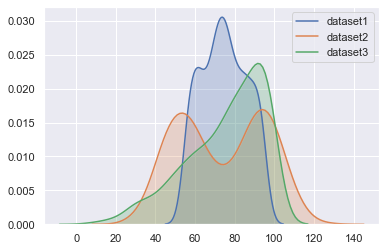

In [14]:
sns.kdeplot(dataset1, shade=True, label="dataset1")
sns.kdeplot(dataset2, shade=True, label="dataset2")
sns.kdeplot(dataset3, shade=True, label="dataset3")

plt.legend()
plt.show()

A KDE plot will give us more information, but it's pretty difficult to read this plot.

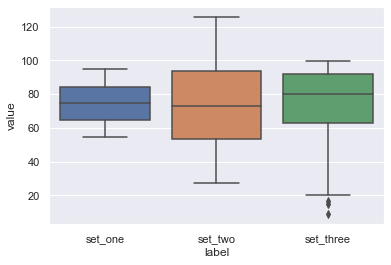

In [15]:
sns.boxplot(data=df, x='label', y='value')
plt.show()

A box plot, on the other hand, makes it easier for us to compare distributions. It also gives us other information, like the interquartile range and any outliers. However, we lose the ability to determine the shape of the data.

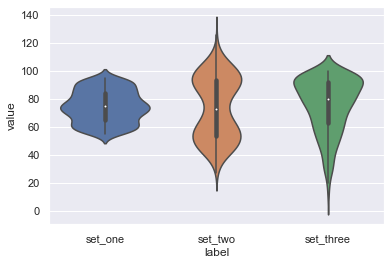

In [16]:
sns.violinplot(data=df, x="label", y="value")
plt.show()

A violin plot brings together shape of the KDE plot with additional information that a box plot provides. It's understandable why many people like this plot!

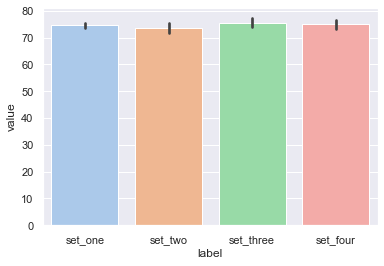

In [19]:
# Take in the data from the CSVs as NumPy arrays:
set_one = np.genfromtxt("data/dataset1.txt", delimiter=",")
set_two = np.genfromtxt("data/dataset2.txt", delimiter=",")
set_three = np.genfromtxt("data/dataset3.txt", delimiter=",")
set_four = np.genfromtxt("data/dataset4.txt", delimiter=",")

# Creating a Pandas DataFrame:
n=500
df = pd.DataFrame({
    "label": ["set_one"] * n + ["set_two"] * n + ["set_three"] * n + ["set_four"] * n,
    "value": np.concatenate([set_one, set_two, set_three, set_four])
})

# Setting styles:
sns.set_style("darkgrid")
sns.set_palette("pastel")

# Add your code below:
sns.barplot(data=df,x="label",y="value")
plt.show()

No handles with labels found to put in legend.


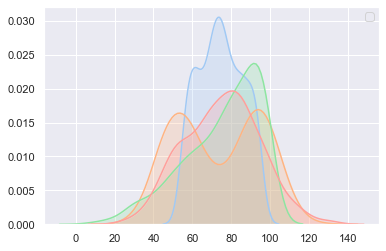

In [21]:
# Take in the data from the CSVs as NumPy arrays:
set_one = np.genfromtxt("data/dataset1.txt", delimiter=",")
set_two = np.genfromtxt("data/dataset2.txt", delimiter=",")
set_three = np.genfromtxt("data/dataset3.txt", delimiter=",")
set_four = np.genfromtxt("data/dataset4.txt", delimiter=",")

# Creating a Pandas DataFrame:
n=500
df = pd.DataFrame({
    "label": ["set_one"] * n + ["set_two"] * n + ["set_three"] * n + ["set_four"] * n,
    "value": np.concatenate([set_one, set_two, set_three, set_four])
})

# Setting styles:
sns.set_style("darkgrid")
sns.set_palette("pastel")

# Add your code below:
sns.kdeplot(set_one, shade=True)
sns.kdeplot(set_two, shade=True)
sns.kdeplot(set_three, shade=True)
sns.kdeplot(set_four,shade=True)
plt.legend()
plt.show()

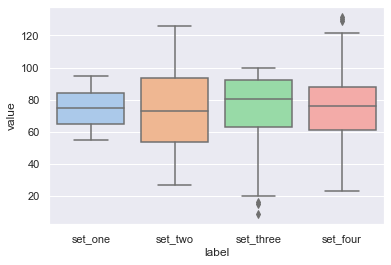

In [22]:
# Setting styles:
sns.set_style("darkgrid")
sns.set_palette("pastel")

# Add your code below:
sns.boxplot(data=df, x="label",y="value")
plt.show()

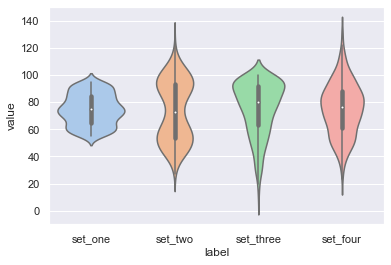

In [23]:
# add a violin plot
sns.violinplot(data=df,x="label",y="value")
plt.show()